#### Description
In this notebook, we are going to predict whether a person's income is above 50k or below 50k using various features like age, education, and occupation
The dataset we are going to use is the census income dataset. So the problem we have is a Supervised Classification type.

## import all libraries

In [19]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [20]:
df=pd.read_csv("train.csv")

In [21]:
df.head()

,Person_Id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,1,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,2,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,3,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,4,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,5,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [22]:
df.tail()


,Person_Id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
32556,32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,32561,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [23]:
df["occupation"].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [24]:
df[df["wage_class"]==" >50K"]

,Person_Id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
7,8,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,9,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,10,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,11,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,12,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32539,32540,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32545,32546,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32554,32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32557,32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


## step 1: Analysis

In [15]:
# Shape of dataset
print('Rows: {} Columns: {}'.format(df.shape[0], df.shape[1]))

Rows: 32561 Columns: 16


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Person_Id       32561 non-null  int64 
 1   age             32561 non-null  int64 
 2   workclass       32561 non-null  object
 3   fnlwgt          32561 non-null  int64 
 4   education       32561 non-null  object
 5   education_num   32561 non-null  int64 
 6   marital_status  32561 non-null  object
 7   occupation      32561 non-null  object
 8   relationship    32561 non-null  object
 9   race            32561 non-null  object
 10  sex             32561 non-null  object
 11  capital_gain    32561 non-null  int64 
 12  capital_loss    32561 non-null  int64 
 13  hours_per_week  32561 non-null  int64 
 14  native_country  32561 non-null  object
 15  wage_class      32561 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Person_Id,32561.0,16281.000000,9399.695394,1.0,8141.0,16281.0,24421.0,32561.0
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education_num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital_gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital_loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [7]:
## check for null value
df.isnull().sum()

Person_Id         0
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [18]:
df["relationship"].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [8]:
## check for "?" in dataset
round((df.isin([' ?']).sum()/df.shape[0])*100,2).astype(str)+' %'

Person_Id          0.0 %
age                0.0 %
workclass         5.64 %
fnlwgt             0.0 %
education          0.0 %
education_num      0.0 %
marital_status     0.0 %
occupation        5.66 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
capital_gain       0.0 %
capital_loss       0.0 %
hours_per_week     0.0 %
native_country    1.79 %
wage_class         0.0 %
dtype: object

In [9]:
## checking the vaue counts of label categories
df["wage_class"].value_counts()

 <=50K    24720
 >50K      7841
Name: wage_class, dtype: int64

#### observation from above analysis
**The dataset doesn't have any null values, but it contains missing values in the form of '?' which needs to be preprocessed.
and dataset is also not balanced as the dependent feature 'wage_class' contains 24720 values have income less than 50k and 7841 values have income more than 50k.**

### step 2 EDA

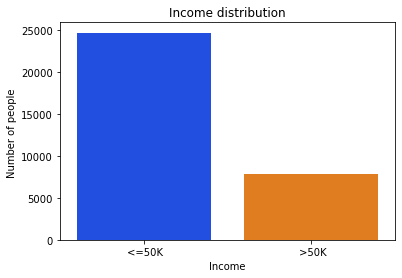

In [10]:
## creating bar graph for wage_class
wage_class=df["wage_class"].value_counts()
sns.barplot(wage_class.index,wage_class.values,palette="bright")
plt.title("Income distribution")
plt.xlabel("Income")
plt.ylabel("Number of people ")

plt.show()

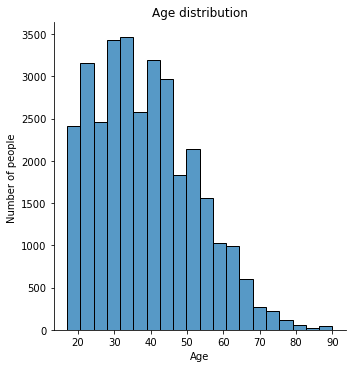

In [11]:
## creating distplot graph for Age
wage_class=df["age"].value_counts()
sns.displot(df["age"],bins=20)
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Number of people ")
plt.show()

##### feature Engineering

In [12]:
df["education"]=df["education"].replace(["Preschool","1st-4th","7th-8th","9th","5th-6th"],"school")
df["education"]=df["education"].replace("HS-grad","High_school")
df["education"]=df["education"].replace("Bachelors","Undergrad")
df["education"]=df["education"].replace("Masters","Grad")
df["education"]=df["education"].replace("Doctorate","Doc")
df["education"]=df["education"].replace(["Assoc-voc","Assoc-acdm","Prof-school","Some-college"],"higher")

In [13]:
df["marital_status"].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

In [14]:
df["marital_status"]=df["marital_status"].replace(["Married-civ-spouse","Married-AF-spouse"],"Married")
df["marital_status"]=df["marital_status"].replace(["Divorced","Separated","Married-AF-spouse","Widowed"],"Other")
df["marital_status"]=df["marital_status"].replace("Never-married","Unmarried")

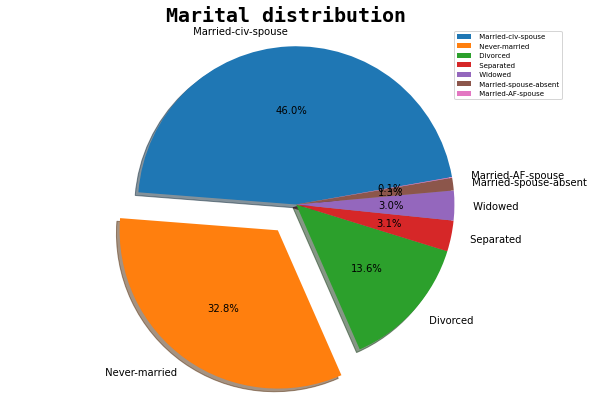

In [15]:
# Creating a pie chart for 'Marital status'
marital = df['marital_status'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

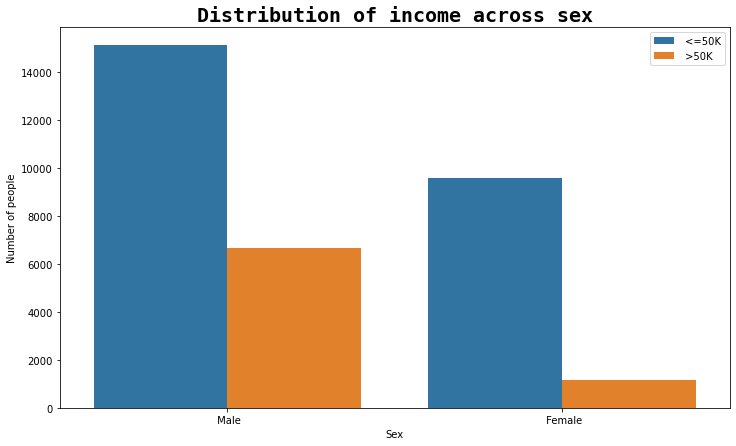

In [16]:
# Creating a countplot of income across sex
plt.figure(figsize=(12, 7))
sns.countplot(df['sex'], hue=df['wage_class'])
plt.title('Distribution of income across sex', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Sex')
plt.ylabel('Number of people')

plt.legend(loc=1, prop={'size': 10})

plt.show()

###### Multivariate Analysis

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [18]:
df['wage_class'] = le.fit_transform(df['wage_class'])

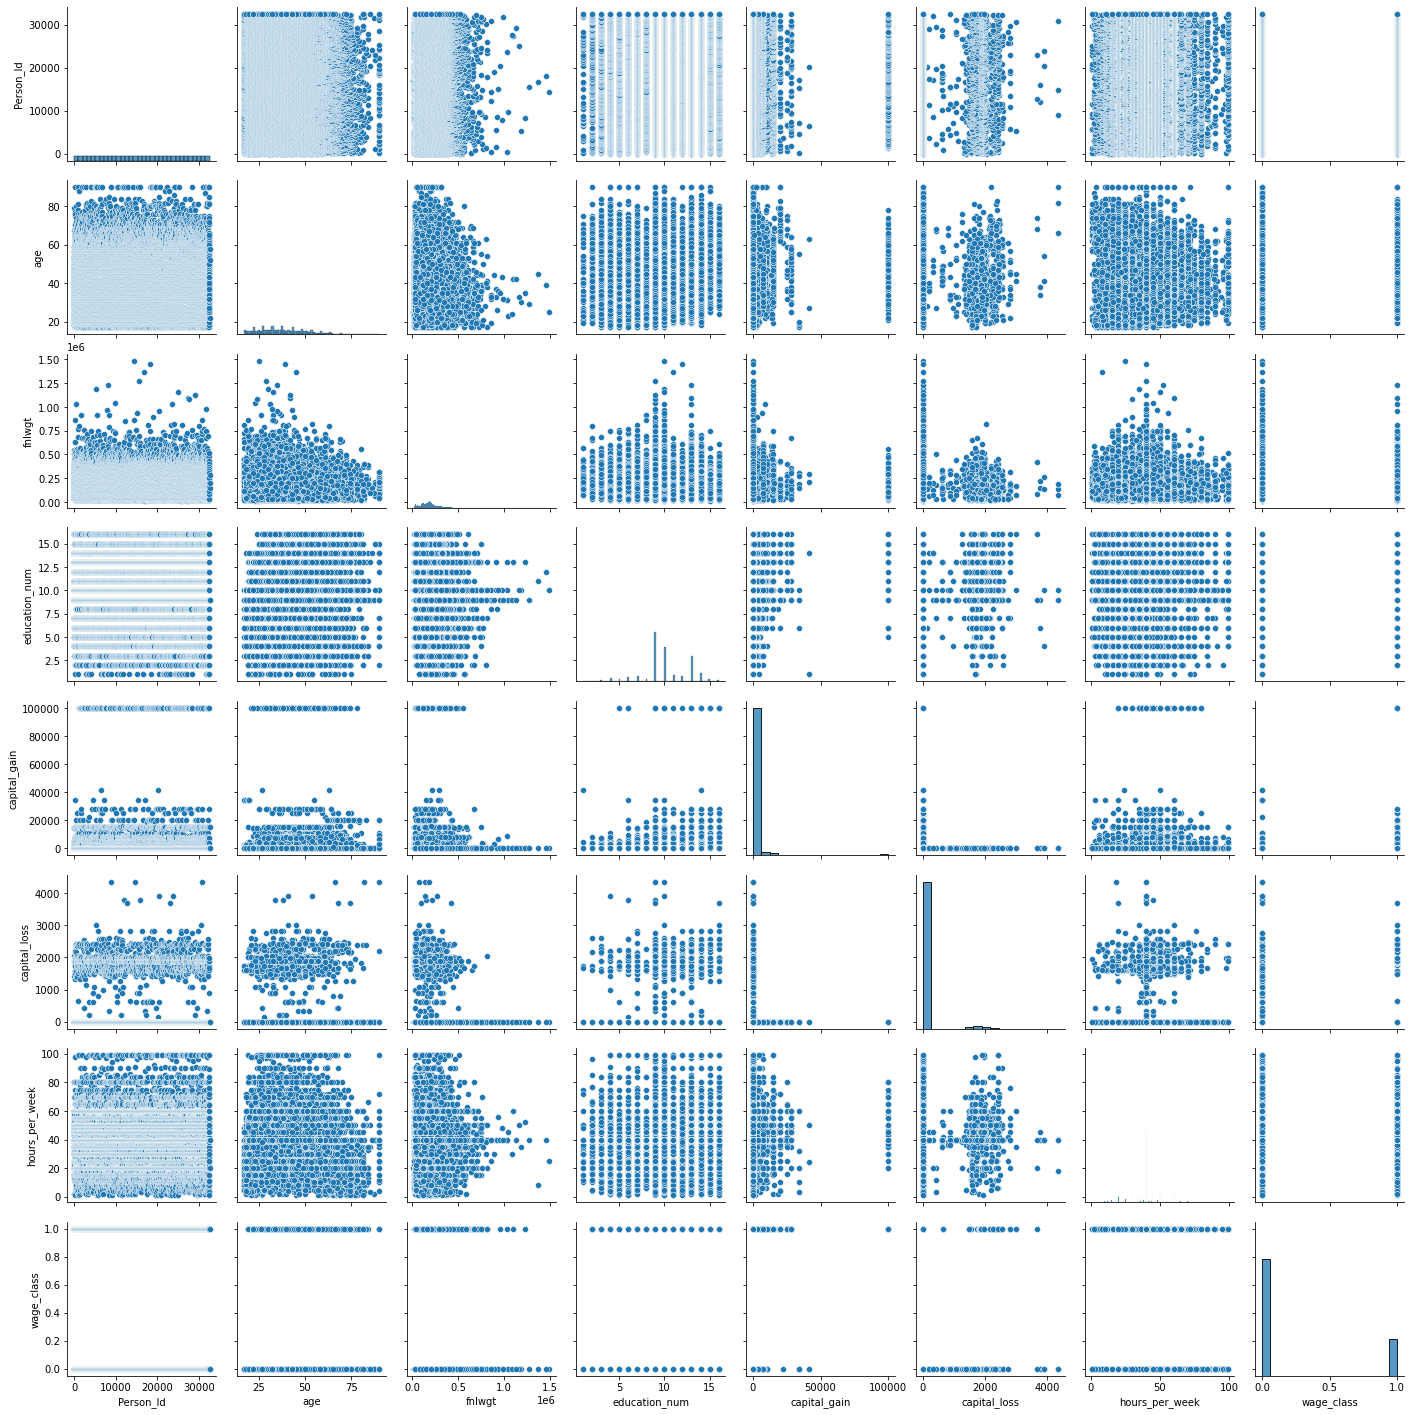

In [19]:
## pairplot
sns.pairplot(df)

In [20]:
df.corr()

,Person_Id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,wage_class
Person_Id,1.000000,0.001286,-0.003153,-0.001079,0.001672,-0.001188,0.000607,0.005404
age,0.001286,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.003153,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
education_num,-0.001079,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
capital_gain,0.001672,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
capital_loss,-0.001188,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
hours_per_week,0.000607,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
wage_class,0.005404,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


<AxesSubplot:>

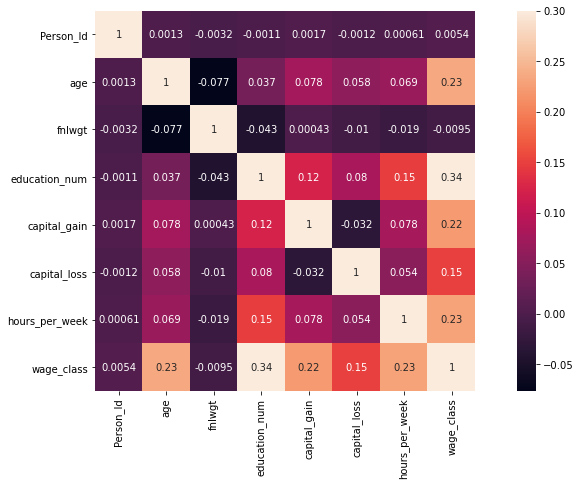

In [21]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),vmax=.3, square=True,annot=True)

###### Observation
From the correlation heatmap, we can see that the dependent feature 'wage_class' is highly correlated with age, numbers of years of education, capital gain and number of hours per week.

## step 3 preprocessing

#### handling "?" value in data

In [22]:
round((df.isin([' ?']).sum()/df.shape[0])*100,2).astype(str)+' %'

Person_Id          0.0 %
age                0.0 %
workclass         5.64 %
fnlwgt             0.0 %
education          0.0 %
education_num      0.0 %
marital_status     0.0 %
occupation        5.66 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
capital_gain       0.0 %
capital_loss       0.0 %
hours_per_week     0.0 %
native_country    1.79 %
wage_class         0.0 %
dtype: object

In [23]:
df.drop("Person_Id",inplace=True,axis=1)

In [24]:
columns=["workclass","native_country","occupation"]
for col in columns:
    df[col]=df[col].replace(" ?",df[col].mode()[0])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  wage_class      32561 non-null  int32 
dtypes: int32(1), int64(6), object(8)
memory usage: 3.6+ MB


#### Handling Categorical Value

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
categorial_col=["workclass","education","marital_status","occupation","relationship","race","sex","native_country"]
for feature in categorial_col:
    label=LabelEncoder()
    df[feature]=label.fit_transform(df[feature])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int32
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int32
 4   education_num   32561 non-null  int64
 5   marital_status  32561 non-null  int32
 6   occupation      32561 non-null  int32
 7   relationship    32561 non-null  int32
 8   race            32561 non-null  int32
 9   sex             32561 non-null  int32
 10  capital_gain    32561 non-null  int64
 11  capital_loss    32561 non-null  int64
 12  hours_per_week  32561 non-null  int64
 13  native_country  32561 non-null  int32
 14  wage_class      32561 non-null  int32
dtypes: int32(9), int64(6)
memory usage: 2.6 MB


#### feature slection

In [29]:
y=df["wage_class"]
X=df.iloc[:,:-1]

In [30]:
from sklearn.ensemble import ExtraTreesClassifier
selector = ExtraTreesClassifier(random_state=42)
selector.fit(X,y)

ExtraTreesClassifier(random_state=42)

In [31]:
important_feature=selector.feature_importances_
for index,val in enumerate(important_feature):
    print(index,round((val*100),2))

0 15.59
1 4.13
2 16.71
3 3.87
4 8.66
5 8.04
6 7.27
7 8.62
8 1.47
9 2.84
10 8.83
11 2.81
12 9.64
13 1.53


In [32]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int32
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int32
 4   education_num   32561 non-null  int64
 5   marital_status  32561 non-null  int32
 6   occupation      32561 non-null  int32
 7   relationship    32561 non-null  int32
 8   race            32561 non-null  int32
 9   sex             32561 non-null  int32
 10  capital_gain    32561 non-null  int64
 11  capital_loss    32561 non-null  int64
 12  hours_per_week  32561 non-null  int64
 13  native_country  32561 non-null  int32
dtypes: int32(8), int64(6)
memory usage: 2.5 MB


In [33]:
X=X.drop(["workclass","education","capital_loss","race","native_country","sex"],axis=1)

In [34]:
X.head()

,age,fnlwgt,education_num,marital_status,occupation,relationship,capital_gain,hours_per_week
0,39,77516,13,4,0,1,2174,40
1,50,83311,13,2,3,0,0,13
2,38,215646,9,0,5,1,0,40
3,53,234721,7,2,5,0,0,40
4,28,338409,13,2,9,5,0,40


#### Feature Scaling 

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
for col in X.columns:
    scaler=StandardScaler()
    X[col]=scaler.fit_transform(X[col].values.reshape(-1,1))
    

In [37]:
X.head()

,age,fnlwgt,education_num,marital_status,occupation,relationship,capital_gain,hours_per_week
0,0.030671,-1.063611,1.134739,0.921634,-1.545256,-0.277805,0.148453,-0.035429
1,0.837109,-1.008707,1.134739,-0.406212,-0.790092,-0.900181,-0.145920,-2.222153
2,-0.042642,0.245079,-0.420060,-1.734058,-0.286649,-0.277805,-0.145920,-0.035429
3,1.057047,0.425801,-1.197459,-0.406212,-0.286649,-0.900181,-0.145920,-0.035429
4,-0.775768,1.408176,1.134739,-0.406212,0.720237,2.211698,-0.145920,-0.035429


### Handling Imbalanced dataset

In [38]:
round(y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    75.92 %
1    24.08 %
Name: wage_class, dtype: object

In [39]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [40]:
ros.fit(X, y)

RandomOverSampler(random_state=42)

In [41]:
X_resampled, Y_resampled = ros.fit_resample(X, y)

In [42]:
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    50.0 %
1    50.0 %
Name: wage_class, dtype: object

## Spliting dataset for traing and testing

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, Y_resampled, test_size=0.3, random_state=0)

## Step 4 Data Modelling

##### Logistic regression

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
log=LogisticRegression()
log.fit(X_train,y_train)
y_pred=log.predict(X_test)
y_pred_on_train=log.predict(X_train)
print("Accourcy score with all feature on test_data: {0:0.4f}".format(accuracy_score(y_test,y_pred)))
print("Accourcy score with all feature on train_data: {0:0.4f}".format(accuracy_score(y_train,y_pred_on_train)))

Accourcy score with all feature on test_data: 0.7583
Accourcy score with all feature on train_data: 0.7539


##### Random Forest classifier 

In [45]:
from sklearn.ensemble import RandomForestClassifier
ran = RandomForestClassifier(random_state=0)
ran.fit(X_train, y_train)
y_pred=ran.predict(X_test)
y_pred_on_train=ran.predict(X_train)
print("Accourcy score with all feature on test_data: {0:0.4f}".format(accuracy_score(y_test,y_pred)))
print("Accourcy score with all feature on train_data: {0:0.4f}".format(accuracy_score(y_train,y_pred_on_train)))

Accourcy score with all feature on test_data: 0.9153
Accourcy score with all feature on train_data: 0.9999


##### XGBClassifier

In [46]:
from xgboost import XGBClassifier
model = XGBClassifier()

In [47]:
model.fit(X_train, y_train)

[12:58:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [48]:
prediction = model.predict(X_test)
prediction_train = model.predict(X_train)
print("Accourcy score with all feature on test_data: {0:0.4f}".format(accuracy_score(y_test,prediction)))
print("Accourcy score with all feature on train_data: {0:0.4f}".format(accuracy_score(y_train,prediction_train)))

Accourcy score with all feature on test_data: 0.8614
Accourcy score with all feature on train_data: 0.8913


##### Hyperprameter Tunning 

In [49]:
from sklearn.model_selection import RandomizedSearchCV

In [50]:
n_estimators = [int(x) for x in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]

In [51]:
param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

In [52]:
rf_tuned = RandomForestClassifier(random_state=42)

In [53]:
rf_cv = RandomizedSearchCV(
    estimator=rf_tuned, param_distributions=param_dist, cv=5, random_state=42)

In [54]:
rf_cv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [40, 47, 55, 63, 71, 79,
                                                      87, 95, 102, 110, 118,
                                                      126, 134, 142, 150],
                                        'n_estimators': [40, 47, 55, 63, 71, 79,
                                                         87, 95, 102, 110, 118,
                                                         126, 134, 142, 150]},
                   random_state=42)

In [55]:
rf_cv.best_score_

0.9052531226959342

In [56]:
rf_cv.best_params_

{'n_estimators': 40, 'max_depth': 102}

In [57]:
rf_best = RandomForestClassifier(
    max_depth=102, n_estimators=40, random_state=42)

In [58]:
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=102, n_estimators=40, random_state=42)

In [59]:
Y_pred_rf_best = rf_best.predict(X_test)
Y_pred_rf_best_for_train = rf_best.predict(X_train)

In [60]:
print('Random Forest Classifier:')
print("Accourcy score with all feature on test_data: {0:0.4f}".format(accuracy_score(y_test,Y_pred_rf_best)))
print("Accourcy score with all feature on train_data: {0:0.4f}".format(accuracy_score(y_train,y_pred_on_train)))

Random Forest Classifier:
Accourcy score with all feature on test_data: 0.9161
Accourcy score with all feature on train_data: 0.9999


# Cleaning Test data / Data preprocessing

In [61]:
df_test=pd.read_csv("test.csv")

In [62]:
df_test.head()

,Person_Id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,32562,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,32563,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,32564,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,32565,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,32566,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States


In [63]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

##### handling "?" value

In [64]:
round((df_test.isin([' ?']).sum()/df.shape[0])*100,2).astype(str)+' %'

Person_Id          0.0 %
age                0.0 %
workclass         2.96 %
fnlwgt             0.0 %
education          0.0 %
education_num      0.0 %
marital_status     0.0 %
occupation        2.97 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
capital_gain       0.0 %
capital_loss       0.0 %
hours_per_week     0.0 %
native_country    0.84 %
dtype: object

In [65]:
columns=["workclass","native_country","occupation"]
for col in columns:
    df_test[col]=df_test[col].replace(" ?",df_test[col].mode()[0])

##### Handling Catgorical Value

In [66]:
categorial_col=["workclass","education","marital_status","occupation","relationship","race","sex","native_country"]
for feature in categorial_col:
    label=LabelEncoder()
    df_test[feature]=label.fit_transform(df_test[feature])

In [67]:
df_test_final=df_test.drop(["Person_Id","workclass","education","capital_loss","race","native_country","sex"],axis=1)

In [68]:
#df_test_final.head()

##### feature Scaling 

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
for col in df_test_final.columns:
    scaler=StandardScaler()
    df_test_final[col]=scaler.fit_transform(df_test_final[col].values.reshape(-1,1))

In [71]:
#df_test_final.head()

##### Predicting using Test data

In [72]:
y_predict=rf_best.predict(df_test_final)

In [73]:
submission=pd.DataFrame({"Person_Id":df_test["Person_Id"],"wage_class":y_predict})

In [74]:
submission.to_csv("submission.csv",index=False)

# saving the model 

In [75]:
import pickle 
pickle_out = open("classifier.pkl", mode = "wb") 
pickle.dump(rf_best, pickle_out) 
pickle_out.close()